# Analyzing the Tate Collection
After focusing my previous project on the gender diversity of artists MoMA's collection, I've decided to look into other high profile art institutions. (This is the last art-museum-gender project from me for this class, I swear! Unless the Met makes more of their data available... in which case, I would love to answer the age old question, "Do women have to be naked to get into the Met Museum?") 

The Tate seems like a pretty progressive museum: They even publish gender pay gap and diversity reports about their workforce. But does their collection reflect their stated values? A cursory analysis below shows that their collection is 96% male, 4% female. That's pretty bad. I'd like to look into their acquisitions over time, as well as what kind of works (e.g. medium) they tend to acquire by male/female artists.

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import glob
from cycler import cycler
%matplotlib inline 

In [3]:
art_df = pd.read_csv('tate_artwork_data.csv')
art_df.shape

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(69201, 20)

In [4]:
art_df.head()

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [5]:
artist_df = pd.read_csv('artist_data.csv')
artist_df.shape

(3532, 9)

In [6]:
artist_df.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


In [7]:
#Combine these two datasets

df = art_df.merge(artist_df, left_on='artist', right_on='name')
df.head()

,id_x,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,url_x,id_y,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_y
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,...,http://www.tate.org.uk/art/artworks/blake-a-fi...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,http://www.tate.org.uk/art/artworks/blake-two-...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,...,http://www.tate.org.uk/art/artworks/blake-the-...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,http://www.tate.org.uk/art/artworks/blake-six-...,38,"Blake, Robert",Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,http://www.tate.org.uk/art/artworks/blake-the-...,39,"Blake, William",Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...


In [8]:
df.dtypes

id_x                    int64
accession_number       object
artist                 object
artistRole             object
artistId                int64
title                  object
dateText               object
medium                 object
creditLine             object
year                   object
acquisitionYear       float64
dimensions             object
width                  object
height                 object
depth                 float64
units                  object
inscription            object
thumbnailCopyright     object
thumbnailUrl           object
url_x                  object
id_y                    int64
name                   object
gender                 object
dates                  object
yearOfBirth           float64
yearOfDeath           float64
placeOfBirth           object
placeOfDeath           object
url_y                  object
dtype: object

In [9]:
df.gender.value_counts()

Male      65892
Female     2727
Name: gender, dtype: int64

In [10]:
df.gender.value_counts(normalize=True)

Male      0.960259
Female    0.039741
Name: gender, dtype: float64

In [11]:
#convert acquisitionYear column from float to int
df['acquisitionYear'] = df.acquisitionYear.fillna(0).astype(int)

In [12]:
#now convert it to a datetime object
df['acquisitionYear_dt'] = pd.to_datetime(df['acquisitionYear'], format="%Y", errors='coerce')

In [13]:
df.acquisitionYear.value_counts().head(2)

1856    37895
1997     3733
Name: acquisitionYear, dtype: int64

In [14]:
# new column counting male artists
df['males'] = df.gender.str.count('Male')

In [15]:
# new column counting female artists
df['females'] = df.gender.str.count('Female')

In [16]:
df.head(15)

,id_x,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_y,acquisitionYear_dt,males,females
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,...,Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1922-01-01,1.0,0.0
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1922-01-01,1.0,0.0
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,...,Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1922-01-01,1.0,0.0
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,...,Male,1762–1787,1762.0,1787.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/robert-blak...,1922-01-01,1.0,0.0
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1919-01-01,1.0,0.0
5,1040,A00006,"Blake, William",artist,39,Ciampolo the Barrator Tormented by the Devils,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1919-01-01,1.0,0.0
6,1041,A00007,"Blake, William",artist,39,The Baffled Devils Fighting,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1919-01-01,1.0,0.0
7,1042,A00008,"Blake, William",artist,39,The Six-Footed Serpent Attacking Agnolo Brunel...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1919-01-01,1.0,0.0
8,1043,A00009,"Blake, William",artist,39,The Serpent Attacking Buoso Donati,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1919-01-01,1.0,0.0
9,1044,A00010,"Blake, William",artist,39,The Pit of Disease: The Falsifiers,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,...,Male,1757–1827,1757.0,1827.0,"London, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/william-bla...,1919-01-01,1.0,0.0


In [71]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

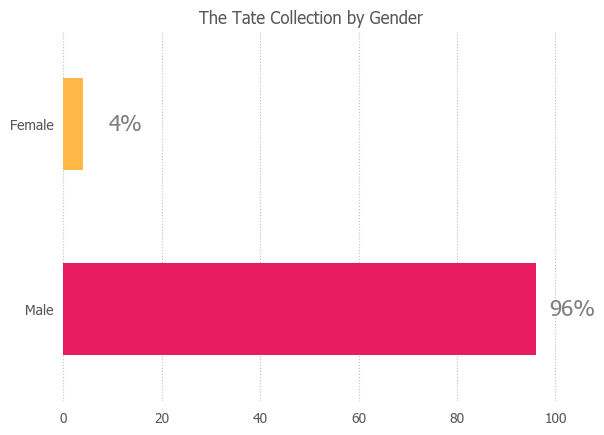

In [88]:
ax = (df.gender.value_counts(normalize=True)*100).plot(kind='barh', title="The Tate Collection by Gender")
ax.grid(False, axis='y')
for i, bar in enumerate(ax.patches):
    value = str(int(round(bar.get_width()))) + "%"
    x_pos = bar.get_width() + 12
    y_pos = i
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='grey', fontsize=16)
plt.savefig("tate-collection-by-gender.pdf")
plt.show()

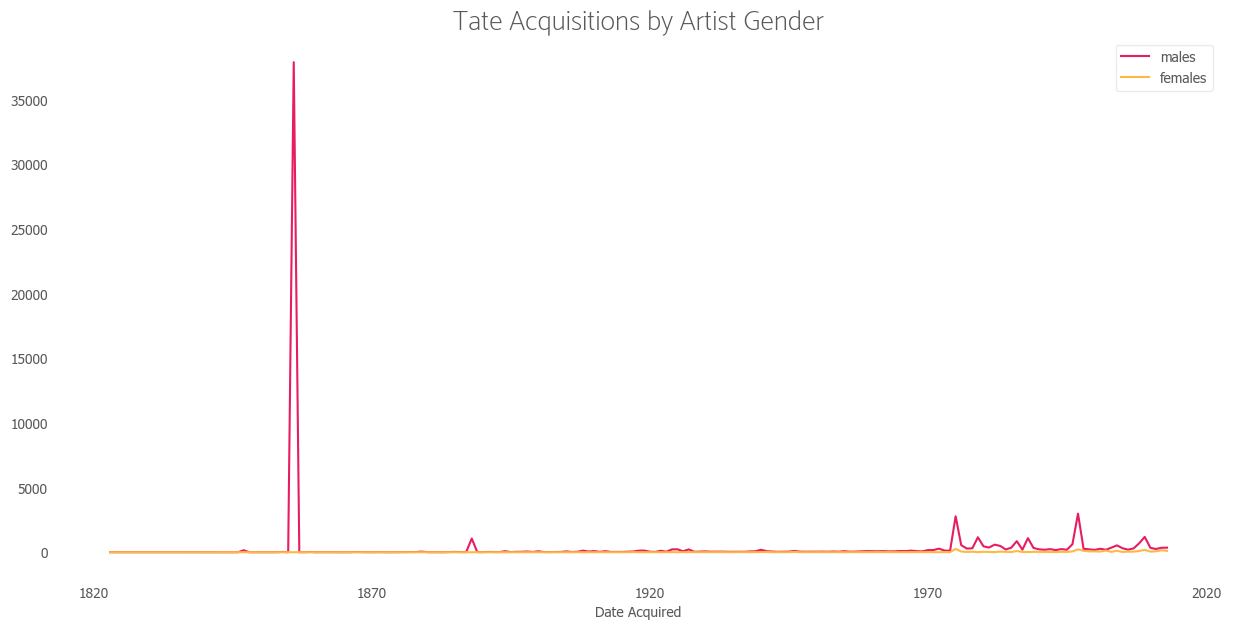

In [89]:
ax = df.resample('A', on='acquisitionYear_dt').sum().plot(y=['males', 'females'], figsize=(15,7), title='Tate Acquisitions by Artist Gender')
ax.set_xlabel("Date Acquired")

ax.title.set_fontsize(20)
ax.title.set_fontname('Catamaran')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
plt.savefig("tate-gender-line-plot.pdf")
plt.show()

In [20]:
# the above chart is too heavily skewed by all the works from 1956, from Henry Tate's private collection
# new dataframe showing the collection starting in the year 1897, when the Tate officially opened to the public
df_1897 = df[df.acquisitionYear >= 1897]

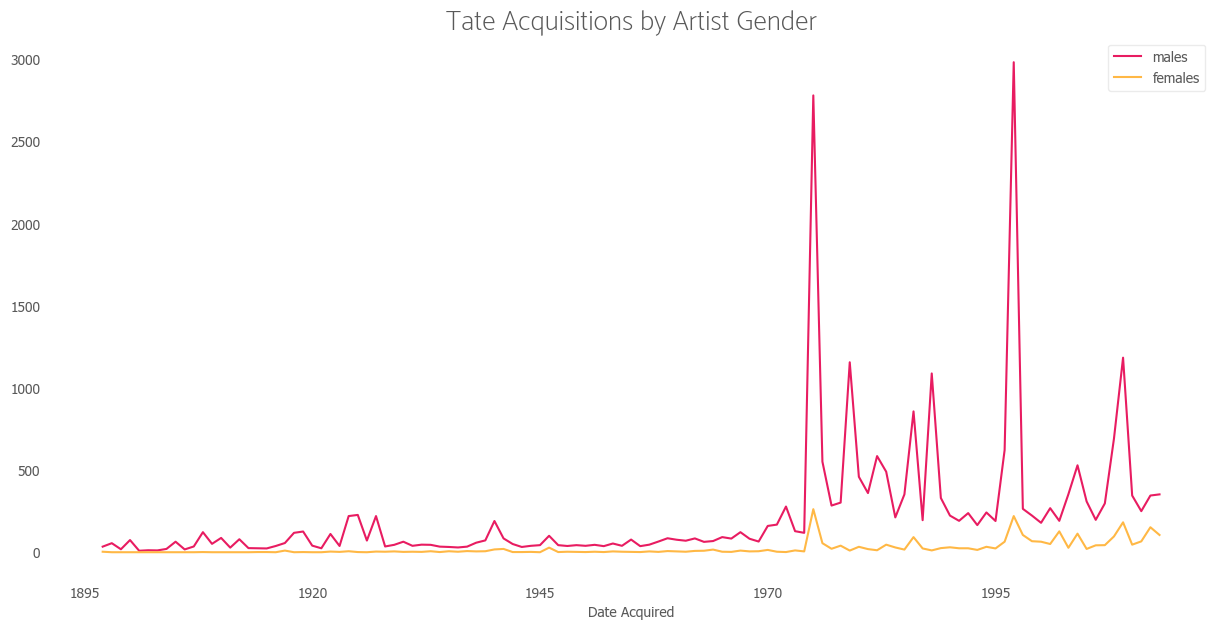

In [90]:
ax = df_1897.resample('A', on='acquisitionYear_dt').sum().plot(y=['males', 'females'], figsize=(15,7), title='Tate Acquisitions by Artist Gender')
ax.set_xlabel("Date Acquired")

ax.title.set_fontsize(20)
ax.title.set_fontname('Catamaran')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
plt.savefig("tate-gender-line-plot-post1897.pdf")
plt.show()

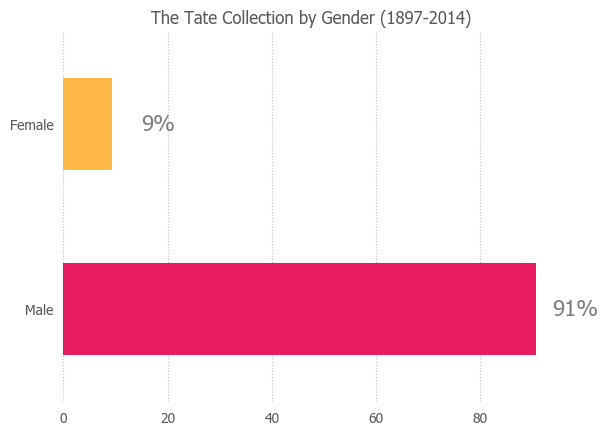

In [91]:
# how does the bar chart change when looking at post-1897?
ax = (df_1897.gender.value_counts(normalize=True)*100).plot(kind='barh', title="The Tate Collection by Gender (1897-2014)")
ax.grid(False, axis='y')
for i, bar in enumerate(ax.patches):
    value = str(int(round(bar.get_width()))) + "%"
    x_pos = bar.get_width() + 12
    y_pos = i
    ax.text(x_pos, y_pos, value, va='center', ha='right', color='grey', fontsize=16)
plt.savefig("tate-collection-by-gender-post1897.pdf")
plt.show()
#... unfortunately it didn't change much


In [23]:
#why so many acquisitions in 1856? the museum officially opened its doors in 1897
df[df.acquisitionYear==1856]

,id_x,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_y,acquisitionYear_dt,males,females
202,28308,D00896,British School 18th century,artist,59,A Country Road,c.1790,Graphite and watercolour on paper,Accepted by the nation as part of the Turner B...,1790,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
203,28311,D00899,British School 18th century,artist,59,Fragment of a Composition: A Ruin beyond a Lak...,?c.1780,Oil paint on canvas,Accepted by the nation as part of the Turner B...,1780,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
204,31568,D04173,British School 18th century,artist,59,Dedham Vale,c.1795–1800,Oil paint on canvas,Accepted by the nation as part of the Turner B...,1795,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
205,35588,D08199,British School 18th century,artist,59,Father Time Clinking Glasses at a Convivial Table,c.1800,Graphite on paper,Accepted by the nation as part of the Turner B...,1800,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
206,35590,D08201,British School 18th century,artist,59,Studies of a Group of Three People round ?a Piano,?c.1798,Pen and ink and graphite on paper,Accepted by the nation as part of the Turner B...,1798,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
207,63735,D36652,British School 18th century,artist,59,A Landscape with a Proposed Elevation of Hafod,c.1798,"Ink wash, graphite and watercolour on paper",Accepted by the nation as part of the Turner B...,1798,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
208,63745,D36662,British School 18th century,artist,59,"The Arch of Titus, Rome",?c.1780,Crayon on paper,Accepted by the nation as part of the Turner B...,1780,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
209,64042,D40280,British School 18th century,artist,59,Three Studies of a Man’s Head,?c.1798,Graphite on paper,Accepted by the nation as part of the Turner B...,1798,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
210,65153,D41456,British School 18th century,artist,59,Schematic Studies of a Head,c.1794–5,Graphite on paper,Accepted by the nation as part of the Turner B...,1794,...,NaN,1700–1799,1700.0,1799.0,NaN,NaN,http://www.tate.org.uk/art/artists/british-sch...,1856-01-01,NaN,NaN
2680,14609,A00909,"Turner, Joseph Mallord William",artist,558,"The Death of Actaeon, with a Distant View of M...",c.1837,Oil paint on canvas,Accepted by the nation as part of the Turner B...,1837,...,Male,1775–1851,1775.0,1851.0,"London, United Kingdom","Chelsea, United Kingdom",http://www.tate.org.uk/art/artists/joseph-mall...,1856-01-01,1.0,0.0


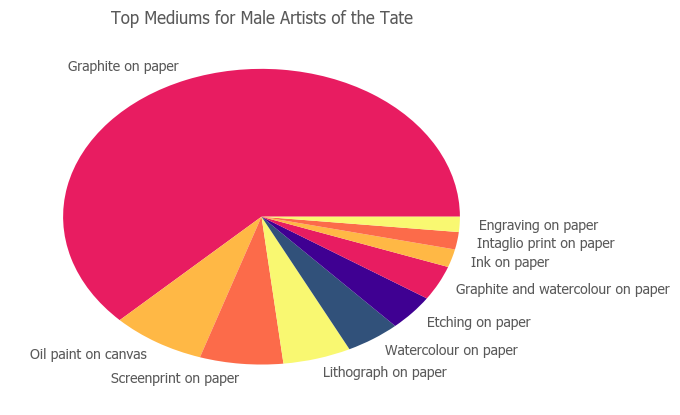

In [24]:
#what kind of works are males and females making?
ax = df[df.gender=='Male'].medium.value_counts().head(10).plot(kind='pie', title="Top Mediums for Male Artists of the Tate")
ax.set_ylabel('')
plt.show()

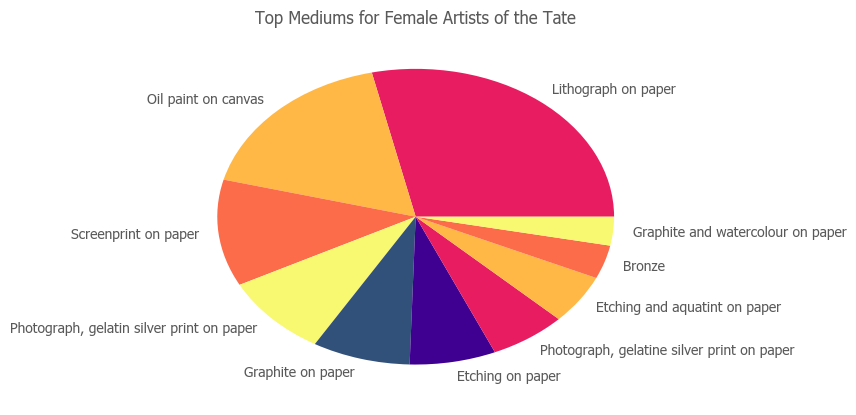

In [25]:
ax = df[df.gender=='Female'].medium.value_counts().head(10).plot(kind='pie', title = "Top Mediums for Female Artists of the Tate")
ax.set_ylabel('')
plt.show()

In [26]:
# What countries are the Tate's artists from? 
df['birth_country'] = df.placeOfBirth.str.extract(", (.*)")

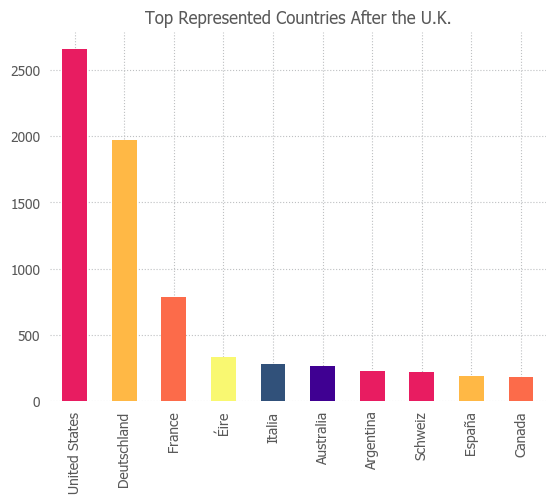

In [27]:
df[df.birth_country != "United Kingdom"].birth_country.value_counts().head(10).plot(kind='bar', title="Top Represented Countries After the U.K.")
plt.show()

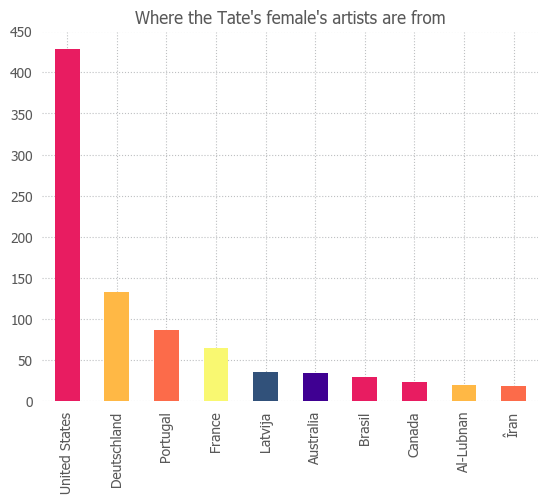

In [46]:
# Besides the UK, where are the female artists from?
female_df = df[df.gender=='Female']
female_df[female_df.birth_country != "United Kingdom"].birth_country.value_counts().head(10).plot(kind='bar', title="Where the Tate's female's artists are from")
plt.show()

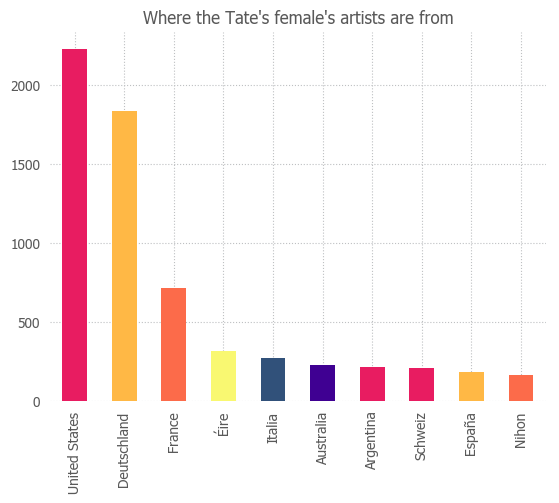

In [37]:
# Besides the UK, where are the female artists from?
male_df = df[df.gender=='Male']
male_df[male_df.birth_country != "United Kingdom"].birth_country.value_counts().head(10).plot(kind='bar', title="Where the Tate's female's artists are from")
plt.show()

In [38]:
df['yearOfBirth'] = df.yearOfBirth.fillna(0).astype(int)

In [43]:
df['yearOfBirth_dt'] = pd.to_datetime(df['yearOfBirth'], format="%Y", errors='coerce')

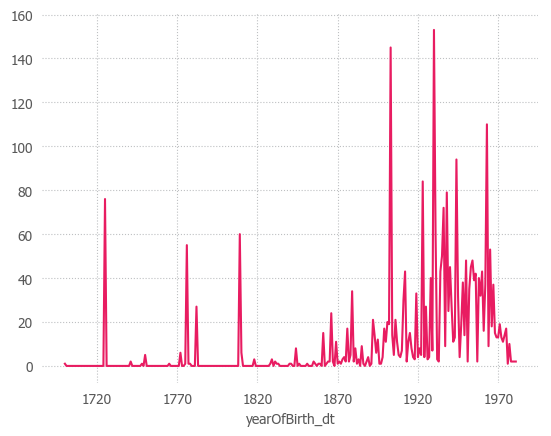

In [47]:
female_df.resample('A', on='yearOfBirth_dt').count().name.plot()
plt.show()

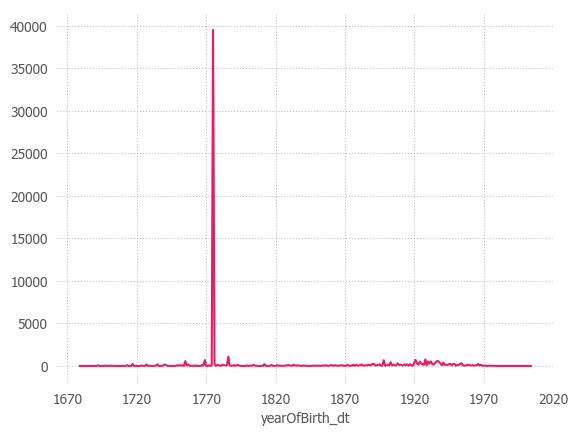

In [45]:
male_df.resample('A', on='yearOfBirth_dt').count().name.plot()
plt.show()

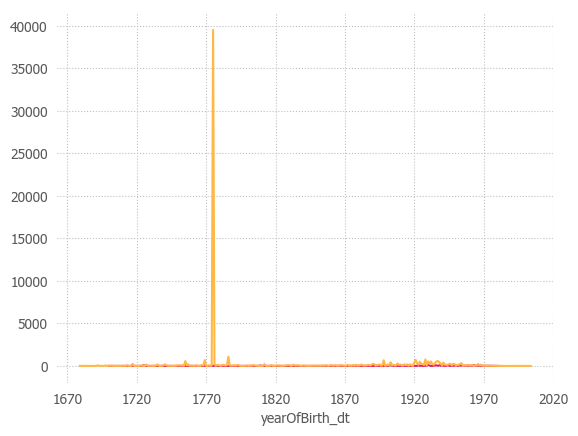

In [60]:
ax = female_df.resample('A', on='yearOfBirth_dt').count().name.plot()
ax = male_df.resample('A', on='yearOfBirth_dt').count().name.plot(ax=ax)
plt.show()

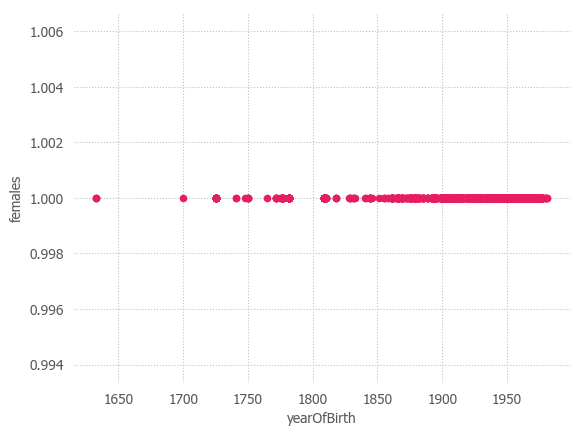

In [37]:
#idk why i tried this
female_df.plot(x='yearOfBirth', y='females', kind='scatter')
plt.show()

In [48]:
female_bars = female_df.groupby('yearOfBirth').females.sum().reset_index()
female_bars.head()

,yearOfBirth,females
0,0,38.0
1,1633,3.0
2,1700,1.0
3,1725,76.0
4,1741,2.0


In [49]:
male_bars = male_df.groupby('yearOfBirth').males.sum().reset_index()

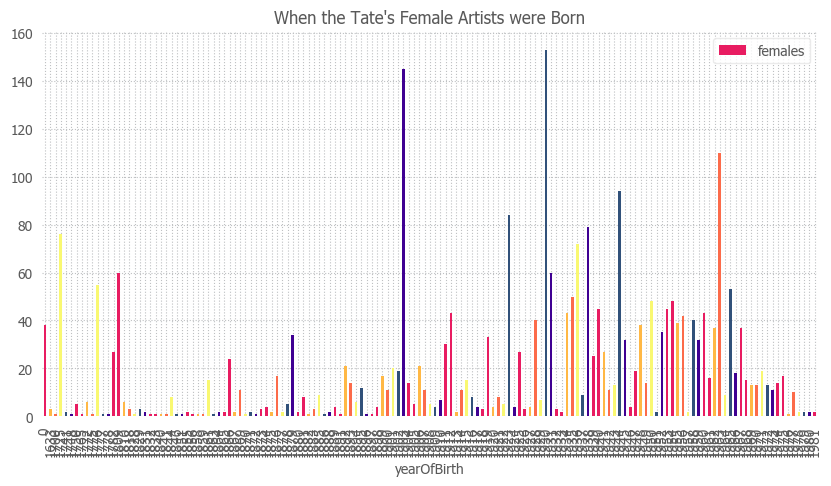

In [50]:
female_bars.plot(kind='bar', x='yearOfBirth', y='females', figsize=(10,5), title="When the Tate's Female Artists were Born")
plt.show()

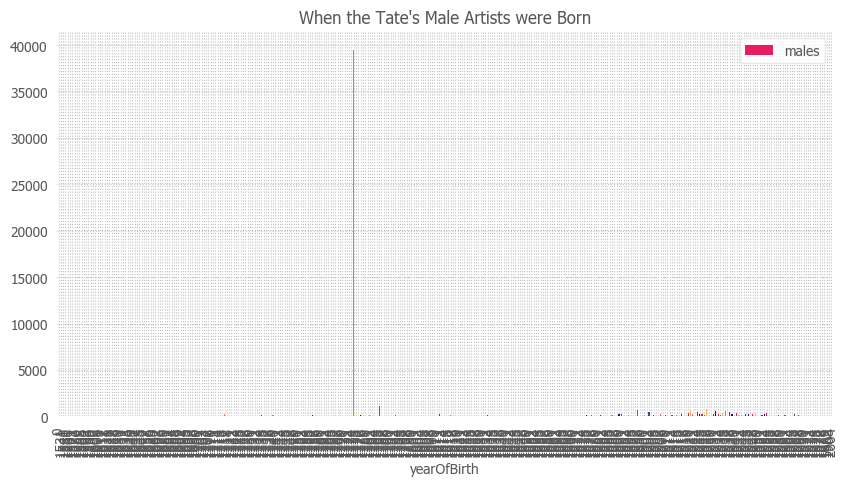

In [51]:
#why so heavily skewed by on year? apparently the museum owns 40k works by JMW Turner, who was born in 1775
male_bars.plot(kind='bar', x='yearOfBirth', y='males', figsize=(10,5), title="When the Tate's Male Artists were Born")
plt.show()

In [52]:
# irresponsibly get rid of turner and make a new df for post-1775
df_1775 = df[df.yearOfBirth > 1775]
female_df_1775 = df_1775[df_1775.gender=='Female']
male_df_1775 = df_1775[df_1775.gender=='Male']

In [53]:
fem_bars_1775 = female_df_1775.groupby('yearOfBirth').females.sum().reset_index()
fem_bars_1775.head()

,yearOfBirth,females
0,1776,55.0
1,1777,1.0
2,1778,1.0
3,1782,27.0
4,1809,60.0


In [54]:
male_bars_1775 = male_df_1775.groupby('yearOfBirth').males.sum().reset_index()
male_bars_1775.head()

,yearOfBirth,males
0,1776,252.0
1,1777,8.0
2,1778,117.0
3,1779,89.0
4,1780,18.0


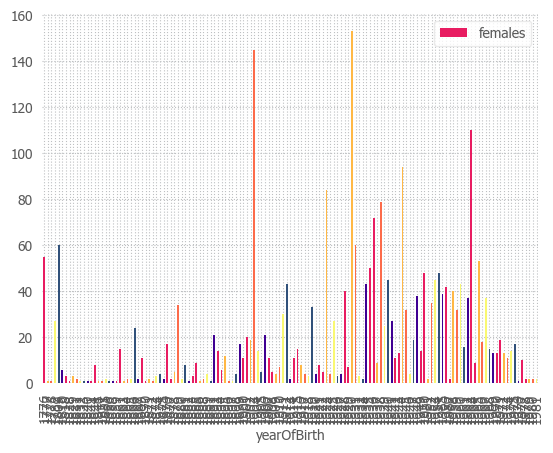

In [55]:
fem_bars_1775.plot(x='yearOfBirth', y='females', kind='bar')
plt.show()

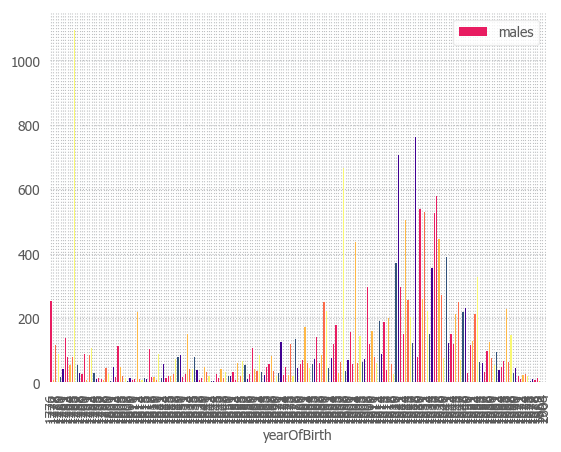

In [56]:
male_bars_1775.plot(x='yearOfBirth', y='males', kind='bar')
plt.show()

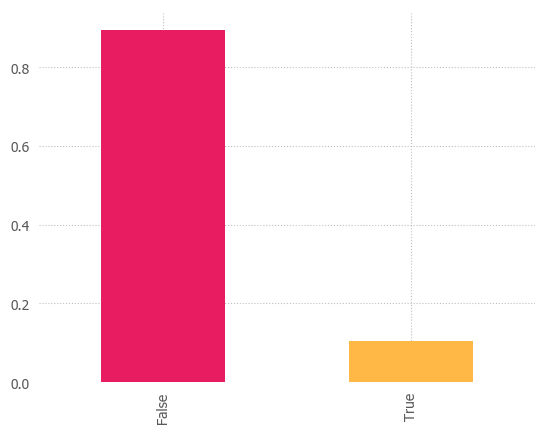

In [60]:
#what percent of the male artists are dead?
ax = male_df.yearOfDeath.isnull().value_counts(normalize=True).plot(kind='bar')
#female_df.yearOfDeath.isnull().value_counts(normalize=True).plot(kind='bar', ax=ax, alpha=0.5)
plt.show()

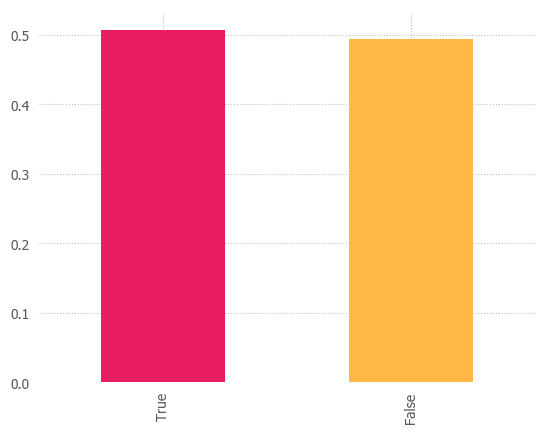

In [61]:
ax = female_df.yearOfDeath.isnull().value_counts(normalize=True).plot(kind='bar')
plt.show()

In [84]:
df_all = pd.DataFrame([{'gender':'male', 'True':0.105536, 'False':0.894464}, {'gender':'female', 'True':0.506417, 'False':0.493583}])
df_all

,False,True,gender
0,0.894464,0.105536,male
1,0.493583,0.506417,female


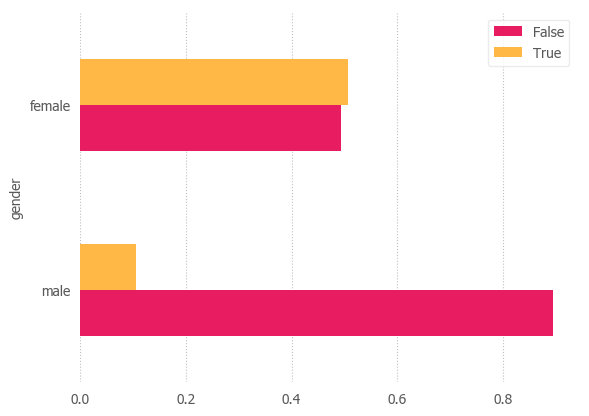

In [94]:
ax = df_all.plot(x='gender', kind='barh')
ax.grid(False, axis='y')
plt.savefig("tate-dead-artists-by-gender.pdf")
plt.show()

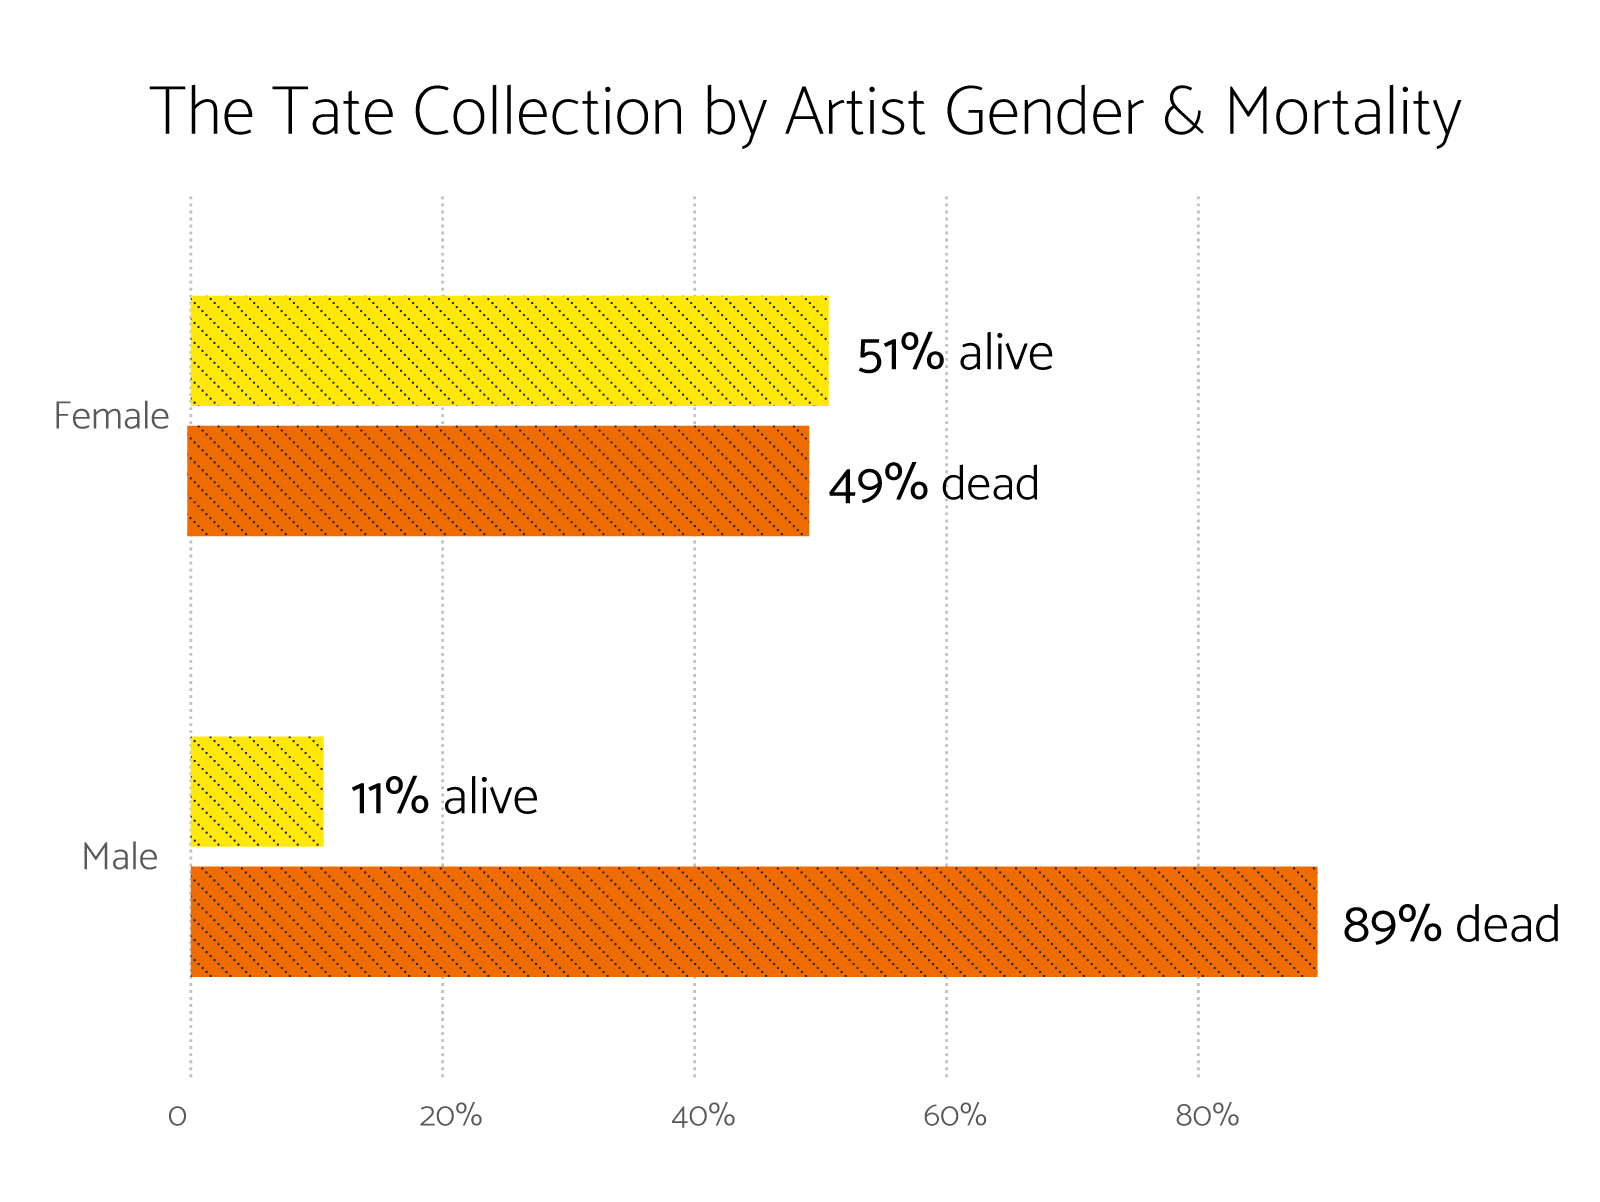

In [103]:
# Go back to the gender split in the collection and try a waffle chart
df.gender.value_counts()

Male      65892
Female     2727
Name: gender, dtype: int64

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


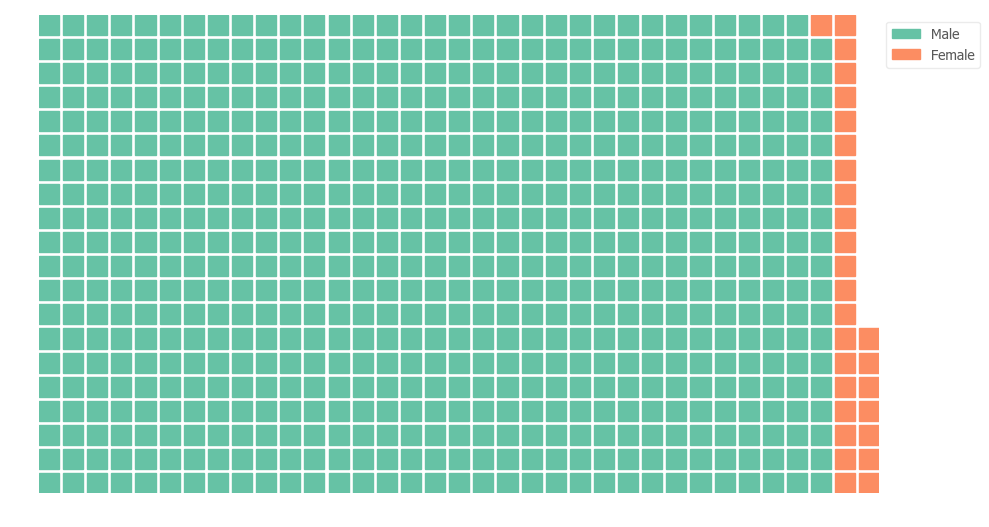

In [115]:
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20,
    values=(df.gender.value_counts()/100),
    labels=list(df.gender.value_counts().index),
    figsize=(10, 10),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.savefig("tate-collection-by-gender-waffle.pdf")
plt.show()